In [1]:
import os 
import pandas as pd

from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
from collections import Counter
import seaborn as sn
import random
import statistics 
import matplotlib.pyplot as plt

import numpy as np

In [2]:
box_file_dir = os.path.join(os.getcwd(), "..", "..", "Box")
file_path_csv = os.path.join(box_file_dir, "covid_pts_enc_level_labs_dx_2021-02-02_deid.csv")

In [3]:
df = pd.read_csv(file_path_csv, index_col=False)

In [4]:
df.head()

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,White,White Hispanic,...,False,False,False,False,False,False,NaN,4dMaH,61003,10650
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,White,White Hispanic,...,False,False,False,False,False,False,3.0,8wQnr,84969,27818
2,2020-03-25 13:25:00,2020-03-30 03:48:00,Medical Center,IP Private/Semi Private room,80,Female,78758,Not Hispanic or Latino,Black or African American,Other race Non Hispanic,...,True,False,True,True,True,False,1.0,6YGuu,69112,34412
3,2020-03-25 13:36:00,2020-03-27 13:15:00,Medical Center,IP Private/Semi Private room,56,Male,78746,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,1.0,P1Tjg,84820,37981
4,2020-03-25 13:43:00,2020-03-27 12:44:00,Medical Center,IP Private/Semi Private room,46,Female,78757,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,0.0,iouKO,76686,41152


In [5]:
def latinx(row):
    if row.ethnicity_display == 'Hispanic or Latino' and row.race_display == 'White':
        return "Hispanic"
    elif row.ethnicity_display == 'Not Hispanic or Latino' and row.race_display == 'White': 
        return "White"
    else:
        return row.race_display

In [6]:
df['race_display'] = df.apply(lambda row: latinx(row), axis=1)

In [7]:
zip_df = pd.read_csv('zip_code_data.csv', index_col=False)
zip_df['zip_code'] = zip_df.zip_code.apply(lambda x: x.strip('ZCTA5 '))
zip_race_df = pd.merge(df, zip_df, left_on='zip_cust_table', right_on='zip_code', how='inner')

### RACE INCOME FOR ICU

In [8]:
icu_zip = zip_race_df[~zip_race_df['icu_hours_summed'].isnull()]

In [9]:
icu_zip = icu_zip[~icu_zip['qSOFA_score'].isnull()]

In [10]:
icu_zip['median_income'] = icu_zip['median_income'].astype(float)

In [11]:
icu_zip['poverty_rate'] = icu_zip['poverty_rate'].astype(float)

In [12]:
aa_df = icu_zip[icu_zip['race_display'] == 'Black or African American']
asian_df = icu_zip[icu_zip['race_display'] == 'Asian']

white_df = icu_zip[icu_zip['race_display'] == 'White']
hispanic_df = icu_zip[icu_zip['race_display'] == 'Hispanic']

In [13]:
len(df)

2469

In [20]:
df[['occupation', 'occ_cat', 'emp_yn']].isnull().any()


occupation     True
occ_cat       False
emp_yn         True
dtype: bool

In [22]:
df[~df['occupation'].isnull()] 

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter
2,2020-03-25 13:25:00,2020-03-30 03:48:00,Medical Center,IP Private/Semi Private room,80,Female,78758,Not Hispanic or Latino,Black or African American,Other race Non Hispanic,...,True,False,True,True,True,False,1.0,6YGuu,69112,34412
3,2020-03-25 13:36:00,2020-03-27 13:15:00,Medical Center,IP Private/Semi Private room,56,Male,78746,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,1.0,P1Tjg,84820,37981
4,2020-03-25 13:43:00,2020-03-27 12:44:00,Medical Center,IP Private/Semi Private room,46,Female,78757,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,0.0,iouKO,76686,41152
5,2020-03-25 21:44:00,2020-03-27 15:17:00,Medical Center,IP Private/Semi Private room,35,Female,78644,Hispanic or Latino,Hispanic,White Hispanic,...,False,False,False,False,False,False,NaN,yTKKH,66044,30056
6,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,1.0,P9yRo,80030,23744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2020-04-09 10:31:00,2020-04-15 13:12:00,Williamson,IP Private/Semi Private room,28,Female,78628,Hispanic or Latino,Hispanic,White Hispanic,...,False,False,False,False,False,False,1.0,zUtHM,81033,30355
2249,2020-04-11 14:22:00,2020-04-21 14:24:00,Hays,IP ICU,64,Male,78744,Hispanic or Latino,Hispanic,White Hispanic,...,False,True,False,False,False,False,0.0,qteOA,82580,19251
2250,2020-04-13 19:40:00,2020-04-18 13:38:00,Hays,IP ICU,86,Female,78744,Hispanic or Latino,Hispanic,White Hispanic,...,False,True,True,False,False,False,1.0,Kh0y8,89185,44135
2251,2020-04-14 08:38:00,2020-04-15 11:52:00,Williamson,IP Private/Semi Private room,53,Male,78660,Unknown,White,White Unknown Ethnicity,...,True,True,False,False,False,False,0.0,0RSzr,66096,48081


In [23]:
df[~df['occ_cat'].isnull()] 

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,Hispanic,White Hispanic,...,False,False,False,False,False,False,NaN,4dMaH,61003,10650
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic,White Hispanic,...,False,False,False,False,False,False,3.0,8wQnr,84969,27818
2,2020-03-25 13:25:00,2020-03-30 03:48:00,Medical Center,IP Private/Semi Private room,80,Female,78758,Not Hispanic or Latino,Black or African American,Other race Non Hispanic,...,True,False,True,True,True,False,1.0,6YGuu,69112,34412
3,2020-03-25 13:36:00,2020-03-27 13:15:00,Medical Center,IP Private/Semi Private room,56,Male,78746,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,1.0,P1Tjg,84820,37981
4,2020-03-25 13:43:00,2020-03-27 12:44:00,Medical Center,IP Private/Semi Private room,46,Female,78757,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,0.0,iouKO,76686,41152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,2020-11-20 20:45:00,NaN,Hays,IP Private/Semi Private room,34,Male,Unknown,Unknown,Unknown,Unknown Race Unknown Ethnicity,...,False,False,False,False,False,False,NaN,u43bg,78767,43034
2465,2020-11-20 20:15:00,NaN,Hays,IP Private/Semi Private room,63,Male,Unknown,Not Hispanic or Latino,Black or African American,Other race Non Hispanic,...,False,False,False,True,False,False,NaN,Kbn70,64353,39856
2466,2020-11-21 13:14:00,NaN,Williamson,IP Private/Semi Private room,56,Female,Unknown,Not Hispanic or Latino,White,White Non Hispanic,...,True,True,False,False,False,False,0.0,cLgBQ,75747,45121
2467,2020-11-21 15:55:00,NaN,Hays,IP Private/Semi Private room,54,Male,Unknown,Hispanic or Latino,Hispanic,White Hispanic,...,False,False,False,False,False,False,0.0,TttS2,76614,13044


In [24]:
df[~df['emp_yn'].isnull()] 

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter
2,2020-03-25 13:25:00,2020-03-30 03:48:00,Medical Center,IP Private/Semi Private room,80,Female,78758,Not Hispanic or Latino,Black or African American,Other race Non Hispanic,...,True,False,True,True,True,False,1.0,6YGuu,69112,34412
3,2020-03-25 13:36:00,2020-03-27 13:15:00,Medical Center,IP Private/Semi Private room,56,Male,78746,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,1.0,P1Tjg,84820,37981
4,2020-03-25 13:43:00,2020-03-27 12:44:00,Medical Center,IP Private/Semi Private room,46,Female,78757,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,0.0,iouKO,76686,41152
5,2020-03-25 21:44:00,2020-03-27 15:17:00,Medical Center,IP Private/Semi Private room,35,Female,78644,Hispanic or Latino,Hispanic,White Hispanic,...,False,False,False,False,False,False,NaN,yTKKH,66044,30056
6,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,1.0,P9yRo,80030,23744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2020-04-09 10:31:00,2020-04-15 13:12:00,Williamson,IP Private/Semi Private room,28,Female,78628,Hispanic or Latino,Hispanic,White Hispanic,...,False,False,False,False,False,False,1.0,zUtHM,81033,30355
2249,2020-04-11 14:22:00,2020-04-21 14:24:00,Hays,IP ICU,64,Male,78744,Hispanic or Latino,Hispanic,White Hispanic,...,False,True,False,False,False,False,0.0,qteOA,82580,19251
2250,2020-04-13 19:40:00,2020-04-18 13:38:00,Hays,IP ICU,86,Female,78744,Hispanic or Latino,Hispanic,White Hispanic,...,False,True,True,False,False,False,1.0,Kh0y8,89185,44135
2251,2020-04-14 08:38:00,2020-04-15 11:52:00,Williamson,IP Private/Semi Private room,53,Male,78660,Unknown,White,White Unknown Ethnicity,...,True,True,False,False,False,False,0.0,0RSzr,66096,48081


In [25]:
 icu_df = df[~df['icu_hours_summed'].isnull()]

In [26]:
icu_df[~icu_df['emp_yn'].isnull()] 

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter
6,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,1.0,P9yRo,80030,23744
11,2020-03-28 18:59:00,2020-06-01 15:15:00,Medical Center,IP ICU,24,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,2.0,23f5M,84794,37705
17,2020-03-31 14:14:00,2020-04-17 17:20:00,Medical Center,IP ICU,55,Male,78602,Not Hispanic or Latino,White,White Non Hispanic,...,False,True,False,False,False,False,0.0,mNyVy,84725,15345
18,2020-03-31 21:23:00,2020-04-08 14:40:00,Medical Center,IP Private/Semi Private room,40,Female,78704,Unknown,White,White Unknown Ethnicity,...,False,False,False,False,False,True,1.0,wTtMC,74571,18447
19,2020-03-31 22:25:00,2020-04-25 15:10:00,Medical Center,IP Private/Semi Private room,43,Male,78722,Not Hispanic or Latino,Black or African American,Other race Non Hispanic,...,True,False,False,False,False,False,1.0,m7vCB,76265,31763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,2020-04-05 23:34:00,2020-04-08 16:55:00,Hays,IP Private/Semi Private room,89,Male,78957,Not Hispanic or Latino,White,White Non Hispanic,...,False,True,False,True,True,True,NaN,xMykZ,86340,22922
2244,2020-04-07 18:30:00,2020-04-11 19:13:00,Hays,IP Private/Semi Private room,55,Female,78640,Not Hispanic or Latino,Other Race,Other race Non Hispanic,...,False,False,False,False,False,False,NaN,TgLdk,66076,32243
2245,2020-04-08 13:44:00,2020-04-22 15:00:00,Hays,IP ICU,62,Male,78676,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,1.0,cwIEA,61688,38754
2249,2020-04-11 14:22:00,2020-04-21 14:24:00,Hays,IP ICU,64,Male,78744,Hispanic or Latino,Hispanic,White Hispanic,...,False,True,False,False,False,False,0.0,qteOA,82580,19251


In [27]:
len(icu_df)

741

In [29]:
(len(icu_df) - 68 )/ len(icu_df)

0.9082321187584346

In [30]:
(len(df) - 132 )/ len(df)

0.9465370595382746

### Black Patients

In [13]:
aa_df['median_income'].describe()[['mean','std', 'min', 'max']]

mean     67908.686275
std      18773.277890
min      38654.000000
max     122182.000000
Name: median_income, dtype: float64

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


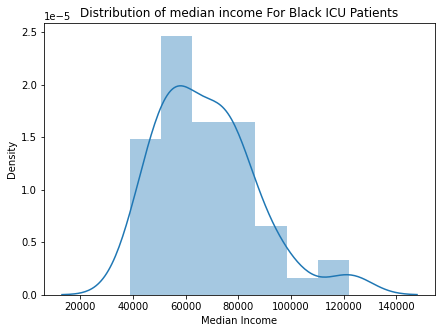

In [14]:
plt.rcParams['figure.figsize'] = (7,5)
sn.distplot(aa_df['median_income'])
#aa_df['median_income'].hist()
plt.title('Distribution of median income For Black ICU Patients')
plt.xlabel('Median Income')
plt.savefig("final_figures/black_median_income.png")

In [15]:
aa_df['poverty_rate'].describe()[['mean','std', 'min', 'max']]

mean    13.194118
std      5.841007
min      5.000000
max     27.900000
Name: poverty_rate, dtype: float64

### Asian Patients

In [16]:
asian_df['median_income'].describe()[['mean','std', 'min', 'max']]

mean    69507.600000
std     18706.843729
min     45835.000000
max     94851.000000
Name: median_income, dtype: float64

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


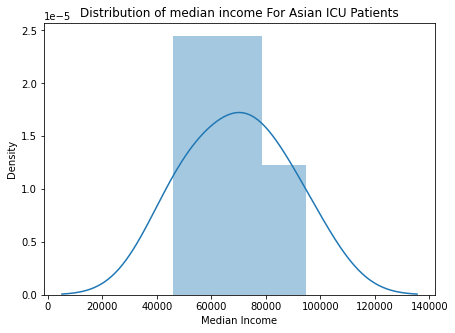

In [17]:
sn.distplot(asian_df['median_income'])
plt.title('Distribution of median income For Asian ICU Patients')
plt.xlabel('Median Income')
plt.savefig("final_figures/asian_median_income.png")

In [18]:
asian_df['poverty_rate'].describe()[['mean','std', 'min', 'max']]

mean    13.400000
std      5.808614
min      9.000000
max     23.400000
Name: poverty_rate, dtype: float64

### White Patients

In [19]:
white_df['median_income'].describe()[['mean','std', 'min', 'max']]

mean     73391.972222
std      24975.157428
min      41081.000000
max     184500.000000
Name: median_income, dtype: float64

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


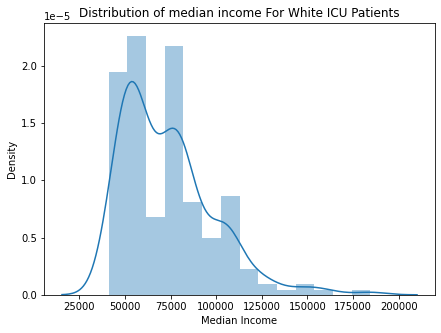

In [20]:
sn.distplot(white_df['median_income'])
plt.title('Distribution of median income For White ICU Patients')
plt.xlabel('Median Income')
plt.savefig("final_figures/white_median_income.png")

In [21]:
white_df['poverty_rate'].describe()[['mean','std', 'min', 'max']]

mean    12.298611
std      6.642299
min      2.300000
max     27.900000
Name: poverty_rate, dtype: float64

### Hispanic Patients

In [22]:
hispanic_df['median_income'].describe()[['mean','std', 'min', 'max']]

mean     62295.456193
std      15617.017515
min      31784.000000
max     122182.000000
Name: median_income, dtype: float64

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


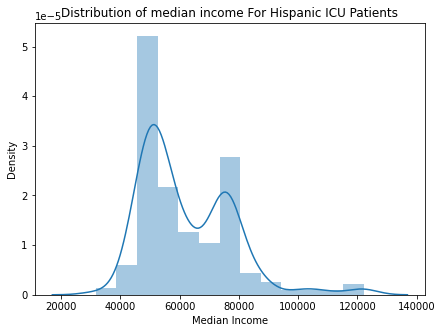

In [23]:
sn.distplot(hispanic_df['median_income'])
plt.title('Distribution of median income For Hispanic ICU Patients')
plt.xlabel('Median Income')
plt.savefig("final_figures/hispanic_median_income.png")

In [24]:
hispanic_df['poverty_rate'].describe()[['mean','std', 'min', 'max']]

mean    15.493051
std      6.166958
min      4.500000
max     27.900000
Name: poverty_rate, dtype: float64

In [25]:
sorted(df.columns)

['ALT',
 'AST',
 'Abs_Lymph',
 'Bili_Total',
 'CAD_com_flag',
 'CKD_com_flag',
 'COPD_com_flag',
 'Creatinine',
 'D-Dimer',
 'Diastolic_Blood_Pressure',
 'Dosing_Weight_(kg)',
 'FiO2/Percent',
 'Glasgow_Coma_Score',
 'Height_(in)',
 'Lymph_Auto',
 'Mean_Arterial_Pressure',
 'Oxygen_Delivery_Method',
 'Oxygen_Flow_Rate',
 'Oxygen_Saturation',
 'Patient_Smoking_Status',
 'Platelet',
 'Procalcitonin',
 'Respiratory_Rate',
 'SARSCOV2',
 'SARSCOV2_Source',
 'Systolic_Blood_Pressure',
 'Troponin-I',
 'Visit_Reason',
 'WBC',
 'admit_dt_tm',
 'admit_source',
 'age_at_admit',
 'arrival_mode',
 'asthma_com_flag',
 'calc_pulled_BMI',
 'cancer_com_flag',
 'dc_dispo_cat',
 'deceased_dt_tm',
 'deid_empi_encounter',
 'deid_fin_encounter',
 'deid_mrn_encounter',
 'diabetes_com_flag',
 'discharge_disposition_display',
 'discharge_dt_tm',
 'emp_yn',
 'encounter_type_display',
 'ethnicity_display',
 'facility',
 'gender',
 'heart_pulse_comb',
 'heartfailure_com_flag',
 'hypertension_com_flag',
 'icd_prim

In [26]:
df['beg_date'] = pd.to_datetime(df['admit_dt_tm'])
df['end_date'] = pd.to_datetime(df['discharge_dt_tm'])
df['vent_start'] = pd.to_datetime(df['vent_first_order_start_time'])
df['vent_end'] = pd.to_datetime(df['vent_last_order_end_time'])

In [27]:
filter_df = df[~df['vent_start'].isnull()]

In [28]:
df['length_of_stay'] = df['end_date'] - df['beg_date']

### Vent durations

In [29]:
filter_df['admit_time_to_vent'] = filter_df['vent_start'] - filter_df['beg_date']

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
filter_df['admit_time_to_vent_end'] = filter_df['vent_end'] - filter_df['beg_date']

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
filter_df['vent_duration'] = filter_df['vent_end'] - filter_df['vent_start']

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='admit_time_to_vent', ylabel='Density'>

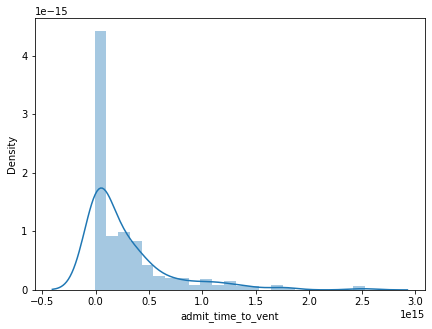

In [32]:
sn.distplot(filter_df['admit_time_to_vent'] )

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


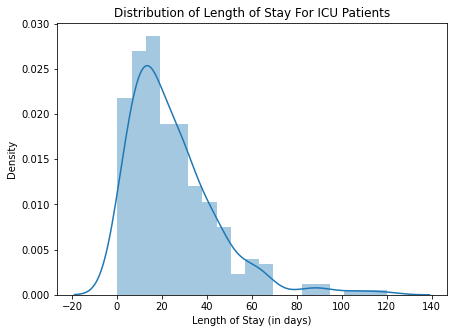

In [33]:
sn.distplot(filter_df['length_of_stay'])
plt.title('Distribution of Length of Stay For ICU Patients')
plt.xlabel('Length of Stay (in days)')
plt.savefig("final_figures/length_of_stay.png")

In [34]:
from datetime import datetime, timedelta
filter_df[filter_df['admit_time_to_vent'] <= timedelta(0)][['admit_dt_tm', 'vent_first_order_start_time']]

,admit_dt_tm,vent_first_order_start_time
806,2020-09-22 17:31:00,2020-09-22 17:31:00
2057,2020-10-17 01:11:00,2020-10-16 22:23:00
2122,2020-10-28 18:42:00,2020-10-28 17:39:00
2258,2020-05-23 20:48:00,2020-05-23 20:24:00
2345,2020-10-11 07:55:00,2020-10-11 07:09:00


In [35]:
filter_df['admit_time_to_vent'].describe()

count                          303
mean     3 days 06:43:35.643564356
std      4 days 18:49:38.582530428
min              -1 days +21:12:00
25%                0 days 02:24:30
50%                1 days 09:00:00
75%                4 days 11:54:30
max               29 days 06:32:00
Name: admit_time_to_vent, dtype: object

In [36]:
filter_df[filter_df['admit_time_to_vent_end'].isnull()]['discharge_disposition_display']

834                 NaN
845     Still a patient
858                 NaN
2154    Still a patient
2173                NaN
2178    Still a patient
2190    Still a patient
2193                NaN
2199                NaN
2386    Still a patient
2425    Still a patient
Name: discharge_disposition_display, dtype: object

In [37]:
filter_df['admit_time_to_vent_end'].describe()

count                           292
mean     19 days 22:36:08.013698630
std      18 days 09:50:18.513488726
min                 0 days 00:34:00
25%                 6 days 17:30:30
50%                15 days 05:46:00
75%                28 days 21:51:30
max               104 days 21:45:00
Name: admit_time_to_vent_end, dtype: object

In [38]:
filter_df['vent_duration'].describe()

count                           292
mean     16 days 16:37:32.054794520
std      17 days 12:01:47.471899098
min                 0 days 00:01:00
25%                 3 days 22:34:00
50%                11 days 07:00:30
75%                23 days 14:42:15
max               102 days 22:24:00
Name: vent_duration, dtype: object

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


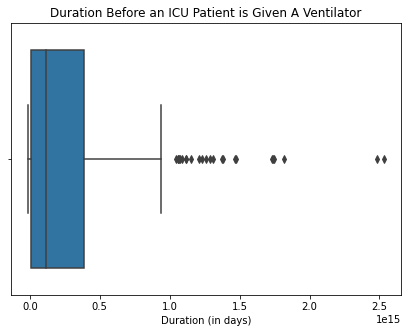

In [39]:
sn.boxplot(filter_df['admit_time_to_vent'].astype(int))
plt.title('Duration Before an ICU Patient is Given A Ventilator')
plt.xlabel('Duration (in days)')
plt.savefig("final_figures/admit_time_to_vent.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


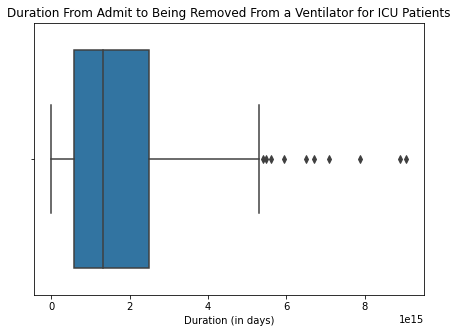

In [40]:
sn.boxplot(filter_df[~filter_df['admit_time_to_vent_end'].isnull()]['admit_time_to_vent_end'].astype(int))
plt.title('Duration From Admit to Being Removed From a Ventilator for ICU Patients')
plt.xlabel('Duration (in days)')
plt.savefig("final_figures/admit_time_to_vent_end.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


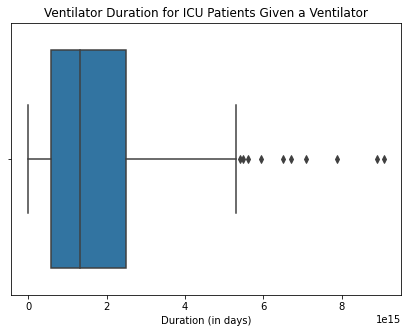

In [41]:
sn.boxplot(filter_df[~filter_df['vent_duration'].isnull()]['admit_time_to_vent_end'].astype(int))
plt.title('Ventilator Duration for ICU Patients Given a Ventilator')
plt.xlabel('Duration (in days)')
plt.savefig("final_figures/vent_duration.png")

### Race by income 

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='admit_time_to_vent_end', ylabel='Density'>

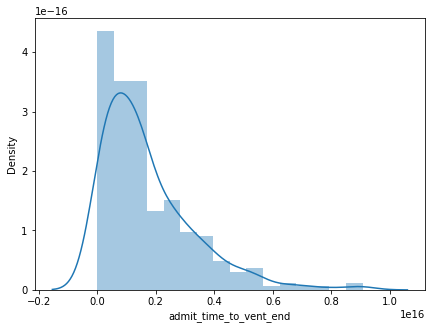

In [42]:
sn.distplot(filter_df[~filter_df['admit_time_to_vent_end'].isnull()]['admit_time_to_vent_end'].astype(int))

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='admit_time_to_vent_end', ylabel='Density'>

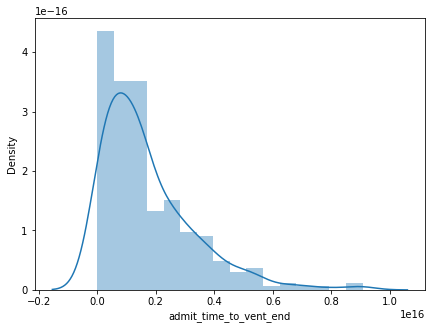

In [43]:
sn.distplot(filter_df[~filter_df['vent_duration'].isnull()]['admit_time_to_vent_end'].astype(int))

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='admit_time_to_vent', ylabel='Density'>

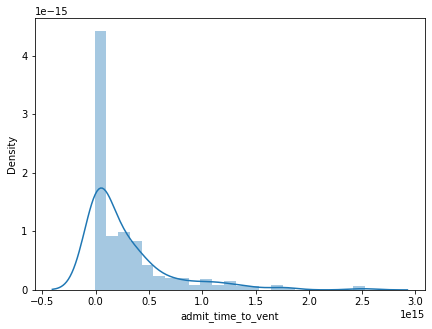

In [44]:
sn.distplot(filter_df['admit_time_to_vent'] )

In [45]:
df['length_of_stay'].mean()

Timedelta('7 days 14:00:55.570469798')

In [46]:
df['length_of_stay'].std()

Timedelta('10 days 15:12:34.824026393')

In [47]:
sorted(pd.to_datetime(df['admit_dt_tm']))

[Timestamp('2020-03-19 15:52:00'),
 Timestamp('2020-03-19 23:26:00'),
 Timestamp('2020-03-21 13:03:00'),
 Timestamp('2020-03-23 17:22:00'),
 Timestamp('2020-03-24 00:07:00'),
 Timestamp('2020-03-24 17:39:00'),
 Timestamp('2020-03-25 13:25:00'),
 Timestamp('2020-03-25 13:36:00'),
 Timestamp('2020-03-25 13:43:00'),
 Timestamp('2020-03-25 21:44:00'),
 Timestamp('2020-03-26 15:21:00'),
 Timestamp('2020-03-26 19:15:00'),
 Timestamp('2020-03-26 21:58:00'),
 Timestamp('2020-03-27 13:12:00'),
 Timestamp('2020-03-27 14:42:00'),
 Timestamp('2020-03-28 06:04:00'),
 Timestamp('2020-03-28 18:59:00'),
 Timestamp('2020-03-29 11:13:00'),
 Timestamp('2020-03-29 21:08:00'),
 Timestamp('2020-03-29 21:50:00'),
 Timestamp('2020-03-29 23:35:00'),
 Timestamp('2020-03-30 04:00:00'),
 Timestamp('2020-03-30 09:05:00'),
 Timestamp('2020-03-30 10:51:00'),
 Timestamp('2020-03-30 12:18:00'),
 Timestamp('2020-03-30 20:16:00'),
 Timestamp('2020-03-31 11:24:00'),
 Timestamp('2020-03-31 12:53:00'),
 Timestamp('2020-03-

In [48]:
len(df[~df['vent_hours_summed'].isnull()])

303

In [49]:
sorted(pd.to_datetime(df['admit_dt_tm']))[-1]

Timestamp('2020-11-21 20:09:00')

In [50]:
len(df['deid_fin_encounter'].unique())

2469

In [51]:
df['race_display'] = df.apply(lambda row: latinx(row), axis=1)

In [52]:
Counter(df['race_display'])

Counter({'Hispanic': 1197,
         'Black or African American': 242,
         'White': 827,
         'Asian': 27,
         'Unknown': 50,
         'Other Race': 91,
         'American Indian/Alaska Native': 12,
         'Decline to Specify': 18,
         'Native Hawaiian or Other Pacific Islande': 5})

In [53]:
Counter(df['facility'])

Counter({'Shoal Creek': 1,
         'Medical Center': 858,
         'Northwest': 11,
         'Dell Seton Med Cntr UT': 1356,
         "Dell Children's": 93,
         'Hays': 79,
         'Williamson': 71})

In [54]:
df['facility'].unique()

array(['Shoal Creek', 'Medical Center', 'Northwest',
       'Dell Seton Med Cntr UT', "Dell Children's", 'Hays', 'Williamson'],
      dtype=object)

In [55]:
icu_df = df[~df['icu_hours_summed'].isnull()]

In [56]:
icu_df['race_display'] = icu_df.apply(lambda row: latinx(row), axis=1)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
Counter(icu_df['race_display'])

Counter({'Hispanic': 369,
         'White': 252,
         'Black or African American': 61,
         'Unknown': 16,
         'American Indian/Alaska Native': 4,
         'Asian': 7,
         'Other Race': 27,
         'Decline to Specify': 4,
         'Native Hawaiian or Other Pacific Islande': 1})

In [58]:
len(icu_df['deid_fin_encounter'].unique())

741

In [59]:
Counter(icu_df['qSOFA_score'])

Counter({nan: 1,
         3.0: 14,
         1.0: 395,
         2.0: 106,
         0.0: 201,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1})

In [60]:
Counter(icu_df['pO2_Art'].values)

Counter({nan: 1,
         470.8: 1,
         250.1: 1,
         56.4: 2,
         102.6: 1,
         77.5: 3,
         197.4: 1,
         73.8: 1,
         55.4: 1,
         103.2: 1,
         nan: 1,
         nan: 1,
         57.3: 2,
         82.5: 1,
         52.5: 1,
         73.9: 1,
         115.0: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         69.0: 2,
         nan: 1,
         nan: 1,
         nan: 1,
         219.9: 1,
         54.2: 2,
         nan: 1,
         106.8: 1,
         38.3: 1,
         nan: 1,
         94.0: 1,
         74.0: 2,
         nan: 1,
         88.4: 1,
         50.1: 2,
         73.7: 2,
         110.1: 1,
         nan: 1,
         93.1: 1,
         68.3: 1,
         61.6: 2,
         61.5: 1,
         61.2: 2,
         101.4: 1,
         101.7: 1,
         nan: 1,
         nan: 1,
         100.8: 2,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         47.0: 2,
         63.3: 1,
         62.8: 4,


In [61]:
sorted(icu_df.columns)

['ALT',
 'AST',
 'Abs_Lymph',
 'Bili_Total',
 'CAD_com_flag',
 'CKD_com_flag',
 'COPD_com_flag',
 'Creatinine',
 'D-Dimer',
 'Diastolic_Blood_Pressure',
 'Dosing_Weight_(kg)',
 'FiO2/Percent',
 'Glasgow_Coma_Score',
 'Height_(in)',
 'Lymph_Auto',
 'Mean_Arterial_Pressure',
 'Oxygen_Delivery_Method',
 'Oxygen_Flow_Rate',
 'Oxygen_Saturation',
 'Patient_Smoking_Status',
 'Platelet',
 'Procalcitonin',
 'Respiratory_Rate',
 'SARSCOV2',
 'SARSCOV2_Source',
 'Systolic_Blood_Pressure',
 'Troponin-I',
 'Visit_Reason',
 'WBC',
 'admit_dt_tm',
 'admit_source',
 'age_at_admit',
 'arrival_mode',
 'asthma_com_flag',
 'beg_date',
 'calc_pulled_BMI',
 'cancer_com_flag',
 'dc_dispo_cat',
 'deceased_dt_tm',
 'deid_empi_encounter',
 'deid_fin_encounter',
 'deid_mrn_encounter',
 'diabetes_com_flag',
 'discharge_disposition_display',
 'discharge_dt_tm',
 'emp_yn',
 'encounter_type_display',
 'end_date',
 'ethnicity_display',
 'facility',
 'gender',
 'heart_pulse_comb',
 'heartfailure_com_flag',
 'hyperten

In [62]:
working_df = icu_df[~icu_df['qSOFA_score'].isnull()] 
working_df

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter,beg_date,end_date,vent_start,vent_end
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic,White Hispanic,...,False,False,3.0,8wQnr,84969,27818,2020-03-24 00:07:00,2020-03-26 18:30:00,2020-03-24 05:55:00,2020-03-26 16:22:00
6,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,1.0,P9yRo,80030,23744,2020-03-26 15:21:00,2020-04-08 13:15:00,2020-03-28 11:14:00,2020-04-03 14:31:00
11,2020-03-28 18:59:00,2020-06-01 15:15:00,Medical Center,IP ICU,24,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,2.0,23f5M,84794,37705,2020-03-28 18:59:00,2020-06-01 15:15:00,2020-03-28 22:09:00,2020-05-27 04:53:00
17,2020-03-31 14:14:00,2020-04-17 17:20:00,Medical Center,IP ICU,55,Male,78602,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,0.0,mNyVy,84725,15345,2020-03-31 14:14:00,2020-04-17 17:20:00,2020-04-07 08:40:00,2020-04-17 15:56:00
18,2020-03-31 21:23:00,2020-04-08 14:40:00,Medical Center,IP Private/Semi Private room,40,Female,78704,Unknown,White,White Unknown Ethnicity,...,False,True,1.0,wTtMC,74571,18447,2020-03-31 21:23:00,2020-04-08 14:40:00,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,2020-11-15 18:38:00,2020-11-18 15:09:00,Williamson,IP Private/Semi Private room,74,Female,78664,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,0.0,dQAmu,80870,31833,2020-11-15 18:38:00,2020-11-18 15:09:00,NaT,NaT
2433,2020-11-15 18:49:00,NaN,Hays,IP Private/Semi Private room,55,Female,78644,Hispanic or Latino,Hispanic,White Hispanic,...,False,False,0.0,Sn4ED,62391,16897,2020-11-15 18:49:00,NaT,NaT,NaT
2437,2020-11-16 10:04:00,2020-11-18 18:10:00,Hays,IP Private/Semi Private room,70,Male,78610,Hispanic or Latino,Hispanic,White Hispanic,...,False,True,0.0,5WXMD,61246,41967,2020-11-16 10:04:00,2020-11-18 18:10:00,NaT,NaT
2450,2020-11-18 17:25:00,2020-11-19 18:10:00,Williamson,IP ICU,66,Male,78665,Unknown,White,White Unknown Ethnicity,...,False,False,0.0,admZf,67825,30836,2020-11-18 17:25:00,2020-11-19 18:10:00,NaT,NaT


In [63]:
data = icu_df[['age_at_admit', 'pO2_Art', 
               'qSOFA_score','race_display',
              'vent_hours_summed', 'zip_cust_table', 'heartfailure_com_flag',
              'cancer_com_flag','gender','WBC','Mean_Arterial_Pressure',
              'Bili_Total','CAD_com_flag','CKD_com_flag','COPD_com_flag',
 'Creatinine', 'FiO2/Percent','Glasgow_Coma_Score','diabetes_com_flag',
 'hypertension_com_flag','length_of_stay','discharge_disposition_display','Platelet', 'deid_empi_encounter']]

In [64]:
data.head()

,age_at_admit,pO2_Art,qSOFA_score,race_display,vent_hours_summed,zip_cust_table,heartfailure_com_flag,cancer_com_flag,gender,WBC,...,COPD_com_flag,Creatinine,FiO2/Percent,Glasgow_Coma_Score,diabetes_com_flag,hypertension_com_flag,length_of_stay,discharge_disposition_display,Platelet,deid_empi_encounter
0,49,NaN,NaN,Hispanic,NaN,Unknown,False,False,Male,NaN,...,False,1.1,NaN,NaN,False,False,6 days 17:39:00,Home,NaN,4dMaH
1,44,470.8,3.0,Hispanic,58.45,78130,False,False,Male,35.1,...,False,2.9,50.0,3.0,False,False,2 days 18:23:00,Expired,42.0,8wQnr
6,49,250.1,1.0,White,293.02,78612,False,False,Female,12.1,...,False,0.9,100.0,15.0,False,False,12 days 21:54:00,Home,355.0,P9yRo
11,24,56.4,2.0,White,1423.18,78753,False,False,Male,19.4,...,False,1.5,80.0,3.0,False,False,64 days 20:16:00,Long Term Care Hospital,370.0,23f5M
17,55,102.6,0.0,White,327.77,78602,False,False,Male,4.6,...,False,1.2,100.0,15.0,False,True,17 days 03:06:00,Expired,199.0,mNyVy


In [65]:
working_df[['race_display', 'age_at_admit']].groupby('race_display').agg(['mean', 'count'])

age_at_admit      
                                                 mean count
race_display                                               
American Indian/Alaska Native               34.000000     4
Asian                                       50.714286     7
Black or African American                   62.186441    59
Decline to Specify                          53.250000     4
Hispanic                                    56.929972   357
Native Hawaiian or Other Pacific Islande    41.000000     1
Other Race                                  51.461538    26
Unknown                                     67.000000    16
White                                       59.913223   242

In [66]:
# only 236 patients with all tests
allo_df = data[['pO2_Art', 'Creatinine', 'FiO2/Percent', 
      'Glasgow_Coma_Score', 'Platelet', 'Mean_Arterial_Pressure',
     'Bili_Total', 'deid_empi_encounter']].dropna()

In [67]:
list_of_patients = list(allo_df['deid_empi_encounter'])

In [68]:
adjusted_patients = data[data['deid_empi_encounter'].isin(list_of_patients)]

In [69]:
def calculate_sofa(row):
    count = 0
    
    # need to implement Fi02/po2
    
    if row.Platelet >= 100 and row.Platelet <= 149:
        count += 1 
        
    elif row.Platelet >= 50 and row.Platelet <= 99:
        count += 2
        
    elif row.Platelet >= 20 and row.Platelet <= 49:
        count += 3
        
    elif row.Platelet < 20:
        count += 4
       
    # Glasgow
    if row.Glasgow_Coma_Score == 13 or row.Glasgow_Coma_Score == 14:
        count += 1 
        
    elif row.Glasgow_Coma_Score >= 10 and row.Glasgow_Coma_Score <= 12:
        count += 2
        
    elif row.Glasgow_Coma_Score >= 6 and row.Glasgow_Coma_Score <= 9:
        count += 3
        
    elif row.Glasgow_Coma_Score < 6:
        count += 4
        
    # Bilirubin 
    
    if float(row.Bili_Total) >= 1.2 and float(row.Bili_Total) <= 1.9:
        count += 1 
        
    elif float(row.Bili_Total) >= 2.0 and float(row.Bili_Total) <= 5.9:
        count += 2
        
    elif float(row.Bili_Total) >= 6.0 and float(row.Bili_Total) <= 11.9:
        count += 3
        
    elif float(row.Bili_Total) >= 12.0:
        count += 4 
        
    # Need to implement Mean artieral pressure later 
    
    # Creatinine 
    
    if row.Creatinine >= 1.2 and row.Creatinine <= 1.9:
        count += 1 
        
    elif row.Creatinine >= 2.0 and row.Creatinine <= 3.4:
        count += 2
        
    elif row.Creatinine >= 3.5 and row.Creatinine <= 4.9:
        count += 3
        
    elif row.Creatinine >= 5.0:
        count += 4 
        
    return count 

In [70]:
allo_df['sofa'] = allo_df.apply(lambda row: calculate_sofa(row), axis = 1)

In [71]:
adjusted_patients['sofa'] = allo_df.apply(lambda row: calculate_sofa(row), axis = 1)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
allo_df['sofa'].describe()

count    236.000000
mean       1.716102
std        1.982883
min        0.000000
25%        0.000000
50%        1.000000
75%        2.250000
max       11.000000
Name: sofa, dtype: float64

In [73]:
adjusted_patients['sofa'].describe()

count    236.000000
mean       1.716102
std        1.982883
min        0.000000
25%        0.000000
50%        1.000000
75%        2.250000
max       11.000000
Name: sofa, dtype: float64

In [74]:
#https://www.mdcalc.com/sequential-organ-failure-assessment-sofa-score#evidence
sofa_mortality_calibration = {
    0: 0,
    1: 0 ,
    2: 6.4,
    3: 6.4,
    4: 20.2,
    5: 20.2,
    6: 21.5,
    7: 21.5,
    8: 33.3,
    9: 33.3 ,
    10: 50.0,
    11: 50.0 ,
    12: 95.2,
    13: 95.2 ,
    14: 95.2  , 
    
}

In [75]:
# still need to check corrobate 
# digging onto various studies on measuring qSOFA for different comorbidities 
# Min linked a paper about influenza 
# can use these values 

qsofa_mortality_calibration = {
    0: 0.6,
    1: 5 ,
    2: 10,
    3: 24,
    
}

In [76]:
working_df.dtypes

admit_dt_tm                       object
discharge_dt_tm                   object
facility                          object
encounter_type_display            object
age_at_admit                       int64
                               ...      
deid_fin_encounter                 int64
beg_date                  datetime64[ns]
end_date                  datetime64[ns]
vent_start                datetime64[ns]
vent_end                  datetime64[ns]
Length: 74, dtype: object

In [77]:
def comorbidity_count(row):
    count = 0 
    
    if row.COPD_com_flag == 1:
        count += 1 
        
    if row.asthma_com_flag == 1:
        count += 1 
        
    if row.diabetes_com_flag == 1:
        count += 1 
        
    if row.hypertension_com_flag == 1:
        count += 1 
        
    if row.CAD_com_flag == 1:
        count += 1 
        
    if row.heartfailure_com_flag == 1: 
        count += 1 
        
    if row.CKD_com_flag == 1:
        count += 1 
        
    if row.cancer_com_flag == 1:
        count += 1 
        
    return count

In [78]:
working_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']] = working_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']].fillna(0)

/home/joel/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [79]:
working_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']] = working_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']].astype(int)

In [80]:
working_df['total_comorbidities'] = working_df.apply(lambda row: comorbidity_count(row), axis=1)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
working_df['cancer_com_flag'].dtype

dtype('int64')

In [82]:
working_df['has_comorbidity'] = working_df.total_comorbidities.apply(lambda x: 1 if x >= 1 else 0)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
working_df['life_years'] = working_df.age_at_admit.apply(lambda x: 100 - x)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
Counter(adjusted_patients['discharge_disposition_display'])

Counter({'Home': 67,
         'Expired': 78,
         'Home Care with Home Health': 19,
         'Rehab Care': 8,
         'Another Hospital': 9,
         'Long Term Care Hospital': 30,
         'Skilled Nursing Care': 21,
         'Still a patient': 7,
         'Home Hospice Care': 1,
         nan: 4,
         'Hospice Facility': 1})

In [85]:
np.nan

nan

In [86]:
class Allocation(object):
    # Code will be adjusted for SOFA. Currently using qSOFA 
    # Only looking at State Level CSC for vent allocation 
    def __init__(self, patients, scarcity, sofa_calibration): # Constructor: set up default values when the class Allocation is called.
        self.patients = patients.copy() # Copy dataframe
        self.patients['death'] = [0 for _ in range(len(self.patients))] # Generate a new column, 'death', and initialize it with 0
        self.patients['allocated_vent'] = ["no" for _ in range(len(self.patients))] # Generate a new colum, 'alllocated_vent', and initialize it with 'no'
        self.num_vents = int(len(patients) * scarcity) # Total number of ventilators available
        self.mortality_model = sofa_calibration
        
    def allocate(self, row):
        prob = self.mortality_model[row.qSOFA_score]
    
        death = np.random.binomial(size=1, n=1, p=prob*.01)[0]
        #print(death)
        
        if death == 1 or row.discharge_disposition_display == 'Expired':
            return death, 'yes'
        else:
            #print('yup yup')
            return death, 'yes'
    
    def check_expiration(self, df):
        temp_df = df.copy()

        for i, row in df.iterrows():
            row = row.copy()
            if (pd.isna(row.vent_hours_summed)) or row.discharge_disposition_display == 'Expired':
        
                temp_df.loc[i, 'death'] = 1

            else:
                
                temp_df.loc[i, 'death'] = 0
                    
        return temp_df
    
    def __run_allocation(self, df2):
        
        for i, row in df2.iterrows():
            row = row.copy()
            if self.num_vents == 0:
                #print('out')
                break
            
            mortality, allocate_cond = self.allocate(row)
            
            df2.loc[i, 'death'] = mortality
                
            df2.loc[i, 'allocated_vent'] = allocate_cond
            
            self.num_vents -= 1 
        
        non_allocated = df2[df2['allocated_vent']=='no']
        allocated = df2[df2['allocated_vent']=='yes']
        
        adj_df = self.check_expiration(non_allocated)
        
        return pd.concat([allocated, adj_df])
    
    # pandas function
    def __age_categorization(self, row):
        if row.age_at_admit < 50:
            return 1 
        elif row.age_at_admit < 70: 
            return 2 
        elif row.age_at_admit < 85:
            return 3 
        else:
            return 4
        
    '''
    State-level CSC Ventilator Allocation Schemes
    '''    
    def maryland(self): # Maryland CSC allocation scheme
        temp_patients = self.patients.copy()
        temp_patients['age_cat'] = temp_patients.apply(lambda row: self.__age_categorization(row)
                                                       , axis=1)
        
        temp_patients.sort_values(by=['qSOFA_score', 'total_comorbidities', 'age_cat'], 
                                      ascending=[True, True, True], inplace=True)
        
        out_df = self.__run_allocation(temp_patients)
        return out_df 
            
    def new_york(self): # New York CSC allocation scheme
        temp_patients = self.patients.copy()

        groups = [df for _, df in temp_patients.groupby('qSOFA_score')]
        random.shuffle(groups)

        grouped = pd.concat(groups).reset_index(drop=True)
        grouped = grouped.sort_values('qSOFA_score', ascending=True)
        
        out_df = self.__run_allocation(grouped)
        return out_df 
    
    '''
    Non State-level CSC Ventilator Allocation Schemes
    '''
     def lottery(self): # Lottery allocation scheme
        temp_patients = self.patients.copy()
        
        temp_patients.sample(frac=1)
        
        out_df = self.__run_allocation(temp_patients)
        return out_df 
    
    def youngest(self): # Youngest allocation scheme
        temp_patients = self.patients.copy()
        
        temp_patients.sort_values(by=['age_at_admit'], ascending=True, inplace=True)
        
        out_df = self.__run_allocation(temp_patients)
        return out_df 

    def max_lives_saved(self):
        temp_patients = self.patients.copy()
        
        temp_patients.sort_values(by=['qSOFA_score'], ascending=True, inplace=True)
        
        out_df = self.__run_allocation(temp_patients)
        return out_df 
    
    def max_life_years(self):   # Max-life allocation scheme
        temp_patients = self.patients.copy()

        temp_patients.sort_values(by=['qSOFA_score', 'life_years'], ascending=[True,False], inplace=True)

        out_df = self.__run_allocation(temp_patients)
        return out_df 
        
    def sickest_first(self):    # Sickest allocation scheme
        temp_patients = self.patients.copy()
        
        temp_patients.sort_values(by=['qSOFA_score'], ascending=False, inplace=True)
        
        out_df = self.__run_allocation(temp_patients)
        return out_df 
        

In [87]:
zip_df = pd.read_csv('zip_code_data.csv', index_col=False)
zip_df['zip_code'] = zip_df.zip_code.apply(lambda x: x.strip('ZCTA5 '))
working_df = pd.merge(working_df, zip_df, left_on='zip_cust_table', right_on='zip_code', how='inner')

### Baseline

In [88]:
working_df['qSOFA_score']

0      3.0
1      2.0
2      1.0
3      0.0
4      1.0
      ... 
647    1.0
648    0.0
649    1.0
650    1.0
651    0.0
Name: qSOFA_score, Length: 652, dtype: float64

In [89]:
Counter(working_df['discharge_disposition_display'])

Counter({'Expired': 148,
         'Rehab Care': 19,
         'Skilled Nursing Care': 50,
         'Still a patient': 12,
         'Home': 280,
         'Long Term Care Hospital': 50,
         'Home Care with Home Health': 48,
         'Another Hospital': 12,
         nan: 14,
         'Home Hospice Care': 6,
         'Hospice Facility': 4,
         'Court/Law Enforcement': 1,
         'Intermediate Care': 4,
         'Psychiatric Hospital': 1,
         'Against Medical Advice': 3})

In [90]:
def latinx(row):
    if row.ethnicity_display == 'Hispanic or Latino' and row.race_display == 'White':
        return "Hispanic"
    elif row.ethnicity_display == 'Not Hispanic or Latino' and row.race_display == 'White': 
        return "White"
    else:
        return row.race_display

In [91]:
working_df['race_display'] = df.apply(lambda row: latinx(row), axis=1)

In [92]:
# later think about the mortality rate as well 
# summarize what I'm going to do and send to Victoria 

In [93]:
# compute other descriptive stats for this groupby 
# final analysis 
working_df[['race_display', 'age_at_admit']].groupby('race_display').agg(['mean', 'count'])

age_at_admit      
                                      mean count
race_display                                    
American Indian/Alaska Native    59.666667     3
Asian                            59.142857     7
Black or African American        61.676923    65
Decline to Specify               57.222222     9
Hispanic                         57.514563   309
Other Race                       58.459459    37
Unknown                          55.208333    24
White                            56.747475   198

In [94]:
race_count = Counter(working_df['race_display'])
race_count

Counter({'Hispanic': 309,
         'Black or African American': 65,
         'White': 198,
         'Asian': 7,
         'Unknown': 24,
         'Other Race': 37,
         'American Indian/Alaska Native': 3,
         'Decline to Specify': 9})

In [95]:
working_df['poverty_rate'] = working_df['poverty_rate'].astype(float)
working_df['median_income'] = working_df['median_income'].astype(float)

In [96]:
bins = [0, 6, 12, 18,24,30,36,40]
bin_conv = [i+1 for i in range(len(bins))]
working_df['zip_binned_by_poverty'] = np.searchsorted(bins, working_df['poverty_rate'].values)
#temp_df['zip_binned_by_poverty'] = np.searchsorted(bins, temp_df['poverty_rate'].values)

In [97]:
bins = [20000, 40000, 60000, 80000,100000]
bin_conv = [i+1 for i in range(len(bins))]
working_df['zip_binned_by_income'] = np.searchsorted(bins, working_df['median_income'].values)

In [98]:
expired_df = working_df[working_df['discharge_disposition_display']=='Expired']

In [99]:
expired_df

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,has_comorbidity,life_years,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,zip_binned_by_poverty,zip_binned_by_income
0,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic,White Hispanic,...,0,56,78130,1.5,10,65627.0,84515,9.5,2,3
7,2020-09-24 18:34:00,2020-10-23 15:44:00,Dell Seton Med Cntr UT,IP ICU,70,Male,78612,Hispanic or Latino,White,White Hispanic,...,1,30,78612,6.3,10.9,69213.0,80458,10.6,2,3
8,2020-10-07 18:00:00,2020-11-16 12:30:00,Dell Seton Med Cntr UT,IP ICU,63,Male,78612,Hispanic or Latino,Asian,White Hispanic,...,1,37,78612,6.3,10.9,69213.0,80458,10.6,2,3
14,2020-04-23 20:17:00,2020-05-15 22:00:00,Medical Center,IP ICU,79,Female,78753,Not Hispanic or Latino,White,White Non Hispanic,...,1,21,78753,2,19.3,51053.0,68301,17.6,3,2
15,2020-04-23 20:18:00,2020-05-01 10:00:00,Medical Center,IP ICU,83,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,...,1,17,78753,2,19.3,51053.0,68301,17.6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2020-06-24 11:24:00,2020-07-02 02:30:00,Dell Seton Med Cntr UT,IP Private Room,95,Female,78731,Not Hispanic or Latino,Hispanic,White Non Hispanic,...,1,5,78731,2.4,10.3,94851.0,154457,9.0,2,4
620,2020-08-04 00:42:00,2020-08-06 06:36:00,Dell Seton Med Cntr UT,IP ICU,69,Female,78731,Not Hispanic or Latino,Hispanic,Other race Non Hispanic,...,1,31,78731,2.4,10.3,94851.0,154457,9.0,2,4
628,2020-07-05 13:54:00,2020-07-19 20:27:00,Dell Seton Med Cntr UT,IP ICU,83,Male,77988,Hispanic or Latino,Hispanic,White Hispanic,...,1,17,77988,16.6,5.5,52794.0,61814,8.6,2,2
635,2020-08-10 13:56:00,2020-09-16 06:38:00,Dell Seton Med Cntr UT,IP ICU,78,Male,78801,Hispanic or Latino,Hispanic,White Hispanic,...,1,22,78801,4.4,20.4,42360.0,57916,18.4,4,2


In [100]:
# From Min 
# Think about a table or graph that we would like 
# to hav

In [101]:
Counter(expired_df['race_display'])

Counter({'Hispanic': 71,
         'White': 42,
         'Asian': 3,
         'Unknown': 3,
         'Black or African American': 18,
         'Other Race': 11})

In [102]:
# number of patients who were on a ventilator 

In [103]:
vent_df = working_df[~working_df['vent_hours_summed'].isnull()]
vent_df

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,has_comorbidity,life_years,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,zip_binned_by_poverty,zip_binned_by_income
0,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic,White Hispanic,...,0,56,78130,1.5,10,65627.0,84515,9.5,2,3
1,2020-06-21 16:50:00,2020-07-23 16:55:00,Medical Center,IP Private/Semi Private room,71,Male,78130,Hispanic or Latino,Hispanic,White Hispanic,...,1,29,78130,1.5,10,65627.0,84515,9.5,2,3
4,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,...,0,51,78612,6.3,10.9,69213.0,80458,10.6,2,3
5,2020-07-10 15:42:00,2020-08-13 17:45:00,Medical Center,IP ICU,59,Male,78612,Hispanic or Latino,Hispanic,Other Race Hispanic,...,1,41,78612,6.3,10.9,69213.0,80458,10.6,2,3
7,2020-09-24 18:34:00,2020-10-23 15:44:00,Dell Seton Med Cntr UT,IP ICU,70,Male,78612,Hispanic or Latino,White,White Hispanic,...,1,30,78612,6.3,10.9,69213.0,80458,10.6,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,2020-08-10 13:56:00,2020-09-16 06:38:00,Dell Seton Med Cntr UT,IP ICU,78,Male,78801,Hispanic or Latino,Hispanic,White Hispanic,...,1,22,78801,4.4,20.4,42360.0,57916,18.4,4,2
638,2020-10-28 18:42:00,2020-11-18 06:07:00,Dell Seton Med Cntr UT,IP ICU,71,Male,79907,Hispanic or Latino,Hispanic,White Hispanic,...,1,29,79907,3,29.4,31784.0,43469,27.6,5,1
642,2020-11-10 00:45:00,NaN,Dell Seton Med Cntr UT,IP ICU,70,Male,79719,Hispanic or Latino,Black or African American,White Hispanic,...,0,30,79719,17.7,21.3,42708.0,47424,24.8,5,2
645,2020-11-12 13:00:00,2020-11-15 14:56:00,Williamson,IP ICU,85,Female,78681,Unknown,Black or African American,White Unknown Ethnicity,...,1,15,78681,0.8,4.7,107912.0,127129,3.5,1,5


In [104]:
# 716 icu patients
# 148 patients who died 
# 289 patients on vents

In [105]:
# Number of patients who died on vent 
vent_df[vent_df['discharge_disposition_display']=='Expired']

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,has_comorbidity,life_years,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,zip_binned_by_poverty,zip_binned_by_income
0,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic,White Hispanic,...,0,56,78130,1.5,10,65627.0,84515,9.5,2,3
7,2020-09-24 18:34:00,2020-10-23 15:44:00,Dell Seton Med Cntr UT,IP ICU,70,Male,78612,Hispanic or Latino,White,White Hispanic,...,1,30,78612,6.3,10.9,69213.0,80458,10.6,2,3
8,2020-10-07 18:00:00,2020-11-16 12:30:00,Dell Seton Med Cntr UT,IP ICU,63,Male,78612,Hispanic or Latino,Asian,White Hispanic,...,1,37,78612,6.3,10.9,69213.0,80458,10.6,2,3
14,2020-04-23 20:17:00,2020-05-15 22:00:00,Medical Center,IP ICU,79,Female,78753,Not Hispanic or Latino,White,White Non Hispanic,...,1,21,78753,2,19.3,51053.0,68301,17.6,3,2
15,2020-04-23 20:18:00,2020-05-01 10:00:00,Medical Center,IP ICU,83,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,...,1,17,78753,2,19.3,51053.0,68301,17.6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2020-08-14 10:46:00,2020-10-03 20:00:00,Dell Seton Med Cntr UT,IP ICU,58,Male,78721,Hispanic or Latino,White,White Hispanic,...,1,42,78721,5.2,29.3,46591.0,69089,25.2,5,2
614,2020-07-30 23:54:00,2020-09-10 12:17:00,Dell Seton Med Cntr UT,IP ICU,69,Male,78748,Hispanic or Latino,White,White Hispanic,...,1,31,78748,2.2,10,76909.0,92430,9.2,2,3
628,2020-07-05 13:54:00,2020-07-19 20:27:00,Dell Seton Med Cntr UT,IP ICU,83,Male,77988,Hispanic or Latino,Hispanic,White Hispanic,...,1,17,77988,16.6,5.5,52794.0,61814,8.6,2,2
635,2020-08-10 13:56:00,2020-09-16 06:38:00,Dell Seton Med Cntr UT,IP ICU,78,Male,78801,Hispanic or Latino,Hispanic,White Hispanic,...,1,22,78801,4.4,20.4,42360.0,57916,18.4,4,2


In [106]:
# 114 vent patients died 
# 175 vent patients survived 

In [107]:
Counter(vent_df[vent_df['discharge_disposition_display']=='Expired']['zip_binned_by_poverty'])

Counter({2: 36, 3: 33, 4: 21, 1: 12, 5: 9})

<AxesSubplot:>

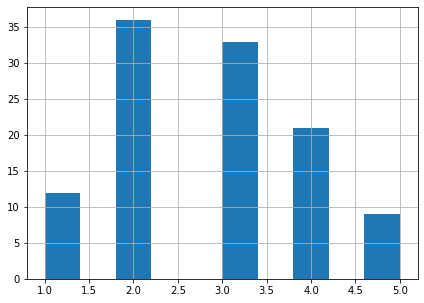

In [108]:
vent_df[vent_df['discharge_disposition_display']=='Expired']['zip_binned_by_poverty'].hist()

In [109]:
vent_df[vent_df['discharge_disposition_display']!='Expired']['zip_binned_by_poverty']

1      2
4      2
5      2
9      3
16     3
      ..
629    1
634    2
642    5
645    1
646    4
Name: zip_binned_by_poverty, Length: 165, dtype: int64

<AxesSubplot:>

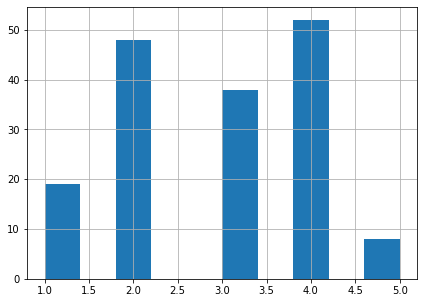

In [110]:
vent_df[vent_df['discharge_disposition_display']!='Expired']['zip_binned_by_poverty'].hist()

In [111]:
vent_df[vent_df['discharge_disposition_display']!='Expired']['zip_binned_by_poverty']

1      2
4      2
5      2
9      3
16     3
      ..
629    1
634    2
642    5
645    1
646    4
Name: zip_binned_by_poverty, Length: 165, dtype: int64

In [112]:
Counter(vent_df[vent_df['discharge_disposition_display']=='Expired']['qSOFA_score'])

Counter({3.0: 4, 1.0: 52, 0.0: 24, 2.0: 31})

<AxesSubplot:>

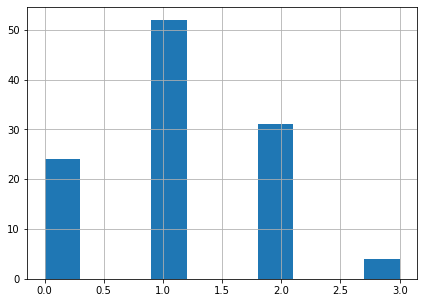

In [113]:
vent_df[vent_df['discharge_disposition_display']=='Expired']['qSOFA_score'].hist()

In [114]:
Counter(vent_df[vent_df['discharge_disposition_display']!='Expired']['qSOFA_score'])

Counter({2.0: 33, 1.0: 99, 0.0: 27, 3.0: 6})

<AxesSubplot:>

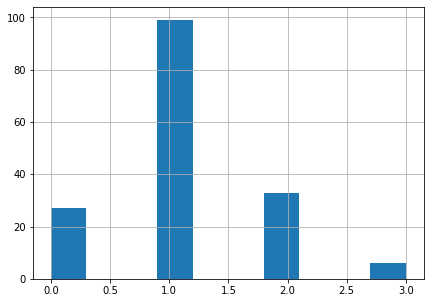

In [115]:
vent_df[vent_df['discharge_disposition_display']!='Expired']['qSOFA_score'].hist()

In [116]:
# 114
vent_df[vent_df['discharge_disposition_display']=='Expired']

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,has_comorbidity,life_years,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,zip_binned_by_poverty,zip_binned_by_income
0,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic,White Hispanic,...,0,56,78130,1.5,10,65627.0,84515,9.5,2,3
7,2020-09-24 18:34:00,2020-10-23 15:44:00,Dell Seton Med Cntr UT,IP ICU,70,Male,78612,Hispanic or Latino,White,White Hispanic,...,1,30,78612,6.3,10.9,69213.0,80458,10.6,2,3
8,2020-10-07 18:00:00,2020-11-16 12:30:00,Dell Seton Med Cntr UT,IP ICU,63,Male,78612,Hispanic or Latino,Asian,White Hispanic,...,1,37,78612,6.3,10.9,69213.0,80458,10.6,2,3
14,2020-04-23 20:17:00,2020-05-15 22:00:00,Medical Center,IP ICU,79,Female,78753,Not Hispanic or Latino,White,White Non Hispanic,...,1,21,78753,2,19.3,51053.0,68301,17.6,3,2
15,2020-04-23 20:18:00,2020-05-01 10:00:00,Medical Center,IP ICU,83,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,...,1,17,78753,2,19.3,51053.0,68301,17.6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2020-08-14 10:46:00,2020-10-03 20:00:00,Dell Seton Med Cntr UT,IP ICU,58,Male,78721,Hispanic or Latino,White,White Hispanic,...,1,42,78721,5.2,29.3,46591.0,69089,25.2,5,2
614,2020-07-30 23:54:00,2020-09-10 12:17:00,Dell Seton Med Cntr UT,IP ICU,69,Male,78748,Hispanic or Latino,White,White Hispanic,...,1,31,78748,2.2,10,76909.0,92430,9.2,2,3
628,2020-07-05 13:54:00,2020-07-19 20:27:00,Dell Seton Med Cntr UT,IP ICU,83,Male,77988,Hispanic or Latino,Hispanic,White Hispanic,...,1,17,77988,16.6,5.5,52794.0,61814,8.6,2,2
635,2020-08-10 13:56:00,2020-09-16 06:38:00,Dell Seton Med Cntr UT,IP ICU,78,Male,78801,Hispanic or Latino,Hispanic,White Hispanic,...,1,22,78801,4.4,20.4,42360.0,57916,18.4,4,2


In [117]:
len(working_df)

652

In [118]:
thresholds = np.linspace(0,1,11)

In [119]:
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [120]:
race_count

Counter({'Hispanic': 309,
         'Black or African American': 65,
         'White': 198,
         'Asian': 7,
         'Unknown': 24,
         'Other Race': 37,
         'American Indian/Alaska Native': 3,
         'Decline to Specify': 9})

In [121]:
baseline_deaths = Counter(working_df[working_df['discharge_disposition_display'] == 'Expired']['race_display'])
baseline_deaths

Counter({'Hispanic': 71,
         'White': 42,
         'Asian': 3,
         'Unknown': 3,
         'Black or African American': 18,
         'Other Race': 11})

In [122]:
race_count

Counter({'Hispanic': 309,
         'Black or African American': 65,
         'White': 198,
         'Asian': 7,
         'Unknown': 24,
         'Other Race': 37,
         'American Indian/Alaska Native': 3,
         'Decline to Specify': 9})

In [123]:
def death_percent(row):
    count = race_count[row.race]
    
    return 100 * (row.death_counts / count)

In [124]:
avg_base_death = statistics.mean(baseline_deaths.values())
baseline_deaths2 = pd.DataFrame(baseline_deaths.items(), columns=['race', 'death_counts'])
baseline_deaths2['threshold'] = 1.1
baseline_deaths2['avg_deaths'] = avg_base_death
baseline_deaths2['death_percent'] = baseline_deaths2.apply(lambda row: death_percent(row), axis=1)
baseline_deaths2['allocation_type'] = 'Baseline'
baseline_deaths2

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type
0,Hispanic,71,1.1,24.666667,22.977346,Baseline
1,White,42,1.1,24.666667,21.212121,Baseline
2,Asian,3,1.1,24.666667,42.857143,Baseline
3,Unknown,3,1.1,24.666667,12.500000,Baseline
4,Black or African American,18,1.1,24.666667,27.692308,Baseline
5,Other Race,11,1.1,24.666667,29.729730,Baseline


In [128]:
print(baseline_deaths2[['race', 'death_percent']].round(2).to_latex())

\begin{tabular}{llr}
\toprule
{} &                       race &  death\_percent \\
\midrule
0 &                   Hispanic &          22.98 \\
1 &                      White &          21.21 \\
2 &                      Asian &          42.86 \\
3 &                    Unknown &          12.50 \\
4 &  Black or African American &          27.69 \\
5 &                 Other Race &          29.73 \\
\bottomrule
\end{tabular}



In [73]:
ITER = 1000

### Lottery

In [74]:
iters = ITER
df_list_lot = []
df_list_lot.append(baseline_deaths2)

for threshold in thresholds:
    sums = 0
    dict_list = []
    df_inner_list = []
    for _ in range(iters):
        allocate = Allocation(working_df, threshold, qsofa_mortality_calibration)
        testing_df_lot = allocate.lottery()
        df_inner_list.append(testing_df_lot)
        sums += testing_df_lot['death'].sum()
        racial_deaths = testing_df_lot[testing_df_lot['death'] == 1]
        dict_list.append(Counter(racial_deaths['race_display']))

    out_df = pd.concat(df_inner_list).groupby(level=0).mean()
    testing_df_lot.to_csv('sim_results/lottery_{}.csv'.format(threshold.round(3)))
    new_df = pd.DataFrame(dict_list)
    temp_new_df = new_df.mean().round(3).to_frame().reset_index()
    temp_new_df = temp_new_df.rename(columns={'index': 'race', 0: 'death_counts'})
    temp_new_df['threshold'] = threshold.round(3)
    temp_new_df['avg_deaths'] = sums/iters
    df_list_lot.append(temp_new_df)
    #avg_deaths = sums/iters
    #avg_deaths

In [75]:
race_count

Counter({'Hispanic': 309,
         'Black or African American': 65,
         'White': 198,
         'Asian': 7,
         'Unknown': 24,
         'Other Race': 37,
         'American Indian/Alaska Native': 3,
         'Decline to Specify': 9})

In [76]:
try_df = pd.concat(df_list_lot)
try_df['death_percent'] = try_df.apply(lambda row: death_percent(row), axis=1)
try_df.to_csv('lottery_data_results.csv', index=False)
try_df 

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type
0,Hispanic,71.000,1.1,24.666667,22.977346,Baseline
1,White,42.000,1.1,24.666667,21.212121,Baseline
2,Asian,3.000,1.1,24.666667,42.857143,Baseline
3,Unknown,3.000,1.1,24.666667,12.500000,Baseline
4,Black or African American,18.000,1.1,24.666667,27.692308,Baseline
...,...,...,...,...,...,...
3,White,9.421,1.0,32.635000,4.758081,NaN
4,Other Race,2.203,1.0,32.635000,5.954054,NaN
5,Decline to Specify,1.299,1.0,32.635000,14.433333,NaN
6,Asian,1.083,1.0,32.635000,15.471429,NaN


In [77]:
race_hue_labels = working_df['race_display'].unique()
race_hue_labels

array(['Hispanic', 'Black or African American', 'White', 'Asian',
       'Unknown', 'Other Race', 'American Indian/Alaska Native',
       'Decline to Specify'], dtype=object)

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


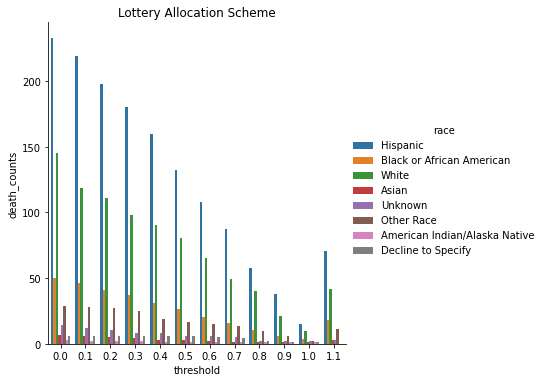

In [78]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_counts', 
                        hue='race', hue_order = race_hue_labels, data=try_df, kind='bar')
plt.title('Lottery Allocation Scheme')
sn_plot.savefig("lottery_plot_output.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


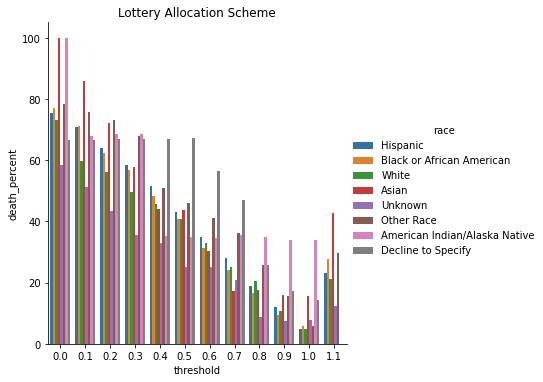

In [79]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=try_df, kind='bar')
plt.title('Lottery Allocation Scheme')
sn_plot.savefig("lottery_plot_percent_output.png")

### New York 

In [80]:
iters = ITER
df_list_lot = []
df_list_lot.append(baseline_deaths2)

for threshold in thresholds:
    sums = 0
    dict_list = []
    df_inner_list = []
    for _ in range(iters):
        allocate = Allocation(working_df, threshold, qsofa_mortality_calibration)
        testing_df_lot = allocate.new_york()
        
        df_inner_list.append(testing_df_lot)
        sums += testing_df_lot['death'].sum()
        racial_deaths = testing_df_lot[testing_df_lot['death'] == 1]
        dict_list.append(Counter(racial_deaths['race_display']))

        
    out_df = pd.concat(df_inner_list).groupby(level=0).mean()
    out_df.to_csv('sim_results/new_york_{}.csv'.format(threshold.round(3)))
    new_df = pd.DataFrame(dict_list)
    temp_new_df = new_df.mean().round(3).to_frame().reset_index()
    temp_new_df = temp_new_df.rename(columns={'index': 'race', 0: 'death_counts'})
    temp_new_df['threshold'] = threshold.round(3)
    temp_new_df['avg_deaths'] = sums/iters
    df_list_lot.append(temp_new_df)
    #avg_deaths = sums/iters
    #avg_deaths

In [81]:
try_df_ny = pd.concat(df_list_lot)
try_df_ny['death_percent'] = try_df_ny.apply(lambda row: death_percent(row), axis=1)
try_df_ny.to_csv('ny_data_results.csv', index=False)
try_df_ny

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type
0,Hispanic,71.000,1.1,24.666667,22.977346,Baseline
1,White,42.000,1.1,24.666667,21.212121,Baseline
2,Asian,3.000,1.1,24.666667,42.857143,Baseline
3,Unknown,3.000,1.1,24.666667,12.500000,Baseline
4,Black or African American,18.000,1.1,24.666667,27.692308,Baseline
...,...,...,...,...,...,...
3,Other Race,2.160,1.0,32.292000,5.837838,NaN
4,Unknown,1.849,1.0,32.292000,7.704167,NaN
5,Black or African American,3.904,1.0,32.292000,6.006154,NaN
6,Asian,1.106,1.0,32.292000,15.800000,NaN


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


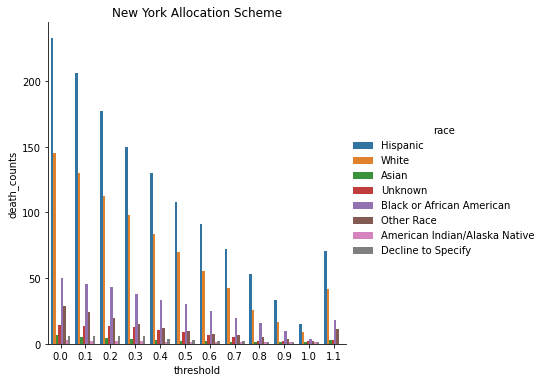

In [82]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_counts', hue='race', data=try_df_ny, kind='bar')
plt.title('New York Allocation Scheme')
sn_plot.savefig("ny_plot_output.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


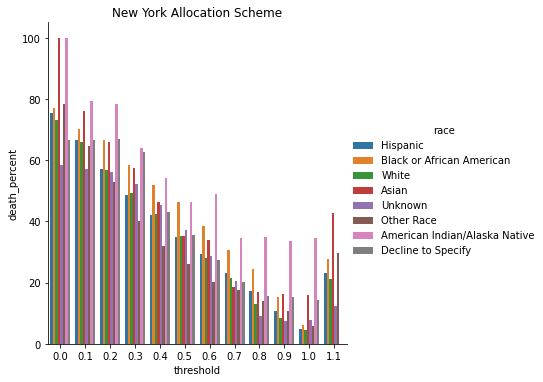

In [83]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=try_df_ny, kind='bar')
plt.title('New York Allocation Scheme')
sn_plot.savefig("ny_plot_percent_output.png")

### Maryland 

In [84]:
iters = ITER
df_list_lot = []
df_list_lot.append(baseline_deaths2)
for threshold in thresholds:
    sums = 0
    dict_list = []
    df_inner_list = []
    for _ in range(iters):
        allocate = Allocation(working_df, threshold, qsofa_mortality_calibration)
        testing_df_lot = allocate.maryland()
        
        df_inner_list.append(testing_df_lot)
        sums += testing_df_lot['death'].sum()
        racial_deaths = testing_df_lot[testing_df_lot['death'] == 1]
        dict_list.append(Counter(racial_deaths['race_display']))

    out_df = pd.concat(df_inner_list).groupby(level=0).mean()
    out_df.to_csv('sim_results/maryland_{}.csv'.format(threshold.round(3)))
    new_df = pd.DataFrame(dict_list)
    temp_new_df = new_df.mean().round(3).to_frame().reset_index()
    temp_new_df = temp_new_df.rename(columns={'index': 'race', 0: 'death_counts'})
    temp_new_df['threshold'] = threshold.round(3)
    temp_new_df['avg_deaths'] = sums/iters
    df_list_lot.append(temp_new_df)
    #avg_deaths = sums/iters
    #avg_deaths

In [85]:
try_df_mar = pd.concat(df_list_lot)
try_df_mar['death_percent'] = try_df_mar.apply(lambda row: death_percent(row), axis=1)
try_df_mar.to_csv('mar_data_results.csv', index=False)
try_df_mar

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type
0,Hispanic,71.000,1.1,24.666667,22.977346,Baseline
1,White,42.000,1.1,24.666667,21.212121,Baseline
2,Asian,3.000,1.1,24.666667,42.857143,Baseline
3,Unknown,3.000,1.1,24.666667,12.500000,Baseline
4,Black or African American,18.000,1.1,24.666667,27.692308,Baseline
...,...,...,...,...,...,...
3,Other Race,2.244,1.0,32.499000,6.064865,NaN
4,Unknown,1.788,1.0,32.499000,7.450000,NaN
5,Asian,1.123,1.0,32.499000,16.042857,NaN
6,American Indian/Alaska Native,1.008,1.0,32.499000,33.600000,NaN


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


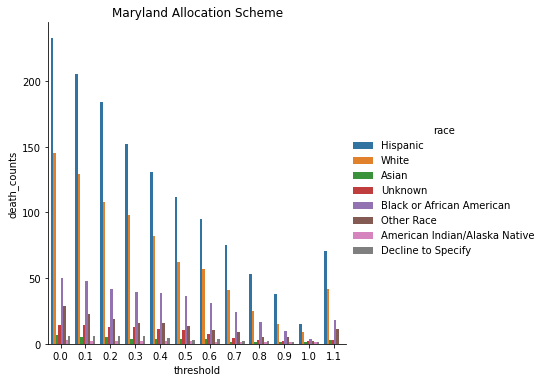

In [86]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_counts', hue='race', data=try_df_mar, kind='bar')
plt.title('Maryland Allocation Scheme')
sn_plot.savefig("mar_plot_output.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


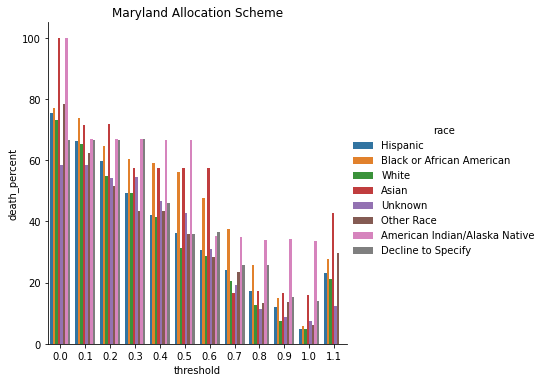

In [87]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=try_df_mar, kind='bar')
plt.title('Maryland Allocation Scheme')
sn_plot.savefig("mar_plot_percent_output.png")

### Max Lives Years

In [88]:
iters = ITER
df_list_lot = []
df_list_lot.append(baseline_deaths2)

for threshold in thresholds:
    sums = 0
    dict_list = []
    df_inner_list = []
    for _ in range(iters):
        allocate = Allocation(working_df, threshold, qsofa_mortality_calibration)
        testing_df_lot = allocate.max_life_years()
        df_inner_list.append(testing_df_lot)
        sums += testing_df_lot['death'].sum()
        racial_deaths = testing_df_lot[testing_df_lot['death'] == 1]
        dict_list.append(Counter(racial_deaths['race_display']))

    out_df = pd.concat(df_inner_list).groupby(level=0).mean()
    out_df.to_csv('sim_results/max_life_years_{}.csv'.format(threshold.round(3)))
    new_df = pd.DataFrame(dict_list)
    temp_new_df = new_df.mean().round(3).to_frame().reset_index()
    temp_new_df = temp_new_df.rename(columns={'index': 'race', 0: 'death_counts'})
    temp_new_df['threshold'] = threshold.round(3)
    temp_new_df['avg_deaths'] = sums/iters
    df_list_lot.append(temp_new_df)
    #avg_deaths = sums/iters
    #avg_deaths

In [89]:
try_df_max_life = pd.concat(df_list_lot)
try_df_max_life['death_percent'] = try_df_max_life.apply(lambda row: death_percent(row), axis=1)
try_df_max_life.to_csv('max_lives_data_results.csv', index=False)
try_df_max_life

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type
0,Hispanic,71.000,1.1,24.666667,22.977346,Baseline
1,White,42.000,1.1,24.666667,21.212121,Baseline
2,Asian,3.000,1.1,24.666667,42.857143,Baseline
3,Unknown,3.000,1.1,24.666667,12.500000,Baseline
4,Black or African American,18.000,1.1,24.666667,27.692308,Baseline
...,...,...,...,...,...,...
3,Unknown,1.867,1.0,32.485000,7.779167,NaN
4,Other Race,2.190,1.0,32.485000,5.918919,NaN
5,Asian,1.118,1.0,32.485000,15.971429,NaN
6,Decline to Specify,1.286,1.0,32.485000,14.288889,NaN


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


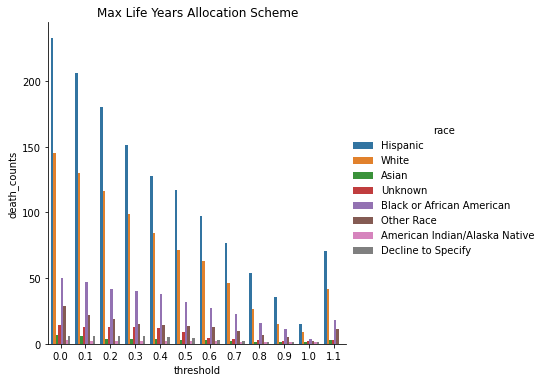

In [90]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_counts', hue='race', data=try_df_max_life, kind='bar')
plt.title('Max Life Years Allocation Scheme')
sn_plot.savefig("max_life_plot_output.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


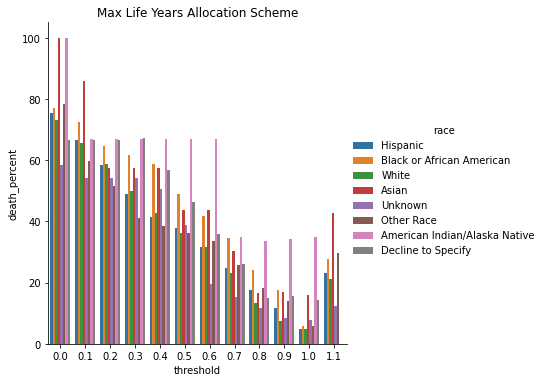

In [91]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=try_df_max_life, kind='bar')
plt.title('Max Life Years Allocation Scheme')
sn_plot.savefig("max_life_plot_percent_output.png")

### Youngest 

In [92]:
iters = ITER
df_list_lot = []
df_list_lot.append(baseline_deaths2)

for threshold in thresholds:
    sums = 0
    dict_list = []
    df_inner_list = []
    for _ in range(iters):
        allocate = Allocation(working_df, threshold, qsofa_mortality_calibration)
        testing_df_lot = allocate.youngest()
        df_inner_list.append(testing_df_lot)
        sums += testing_df_lot['death'].sum()
        racial_deaths = testing_df_lot[testing_df_lot['death'] == 1]
        dict_list.append(Counter(racial_deaths['race_display']))

    out_df = pd.concat(df_inner_list).groupby(level=0).mean()
    out_df.to_csv('sim_results/max_life_years_{}.csv'.format(threshold.round(3)))
    new_df = pd.DataFrame(dict_list)
    temp_new_df = new_df.mean().round(3).to_frame().reset_index()
    temp_new_df = temp_new_df.rename(columns={'index': 'race', 0: 'death_counts'})
    temp_new_df['threshold'] = threshold.round(3)
    temp_new_df['avg_deaths'] = sums/iters
    df_list_lot.append(temp_new_df)
    #avg_deaths = sums/iters
    #avg_deaths

In [93]:
try_df_youngest = pd.concat(df_list_lot)
try_df_youngest['death_percent'] = try_df_youngest.apply(lambda row: death_percent(row), axis=1)
try_df_youngest.to_csv('youngest_data_results.csv', index=False)
try_df_youngest

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type
0,Hispanic,71.000,1.1,24.666667,22.977346,Baseline
1,White,42.000,1.1,24.666667,21.212121,Baseline
2,Asian,3.000,1.1,24.666667,42.857143,Baseline
3,Unknown,3.000,1.1,24.666667,12.500000,Baseline
4,Black or African American,18.000,1.1,24.666667,27.692308,Baseline
...,...,...,...,...,...,...
3,Black or African American,3.866,1.0,32.500000,5.947692,NaN
4,American Indian/Alaska Native,1.020,1.0,32.500000,34.000000,NaN
5,Asian,1.117,1.0,32.500000,15.957143,NaN
6,Other Race,2.109,1.0,32.500000,5.700000,NaN


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


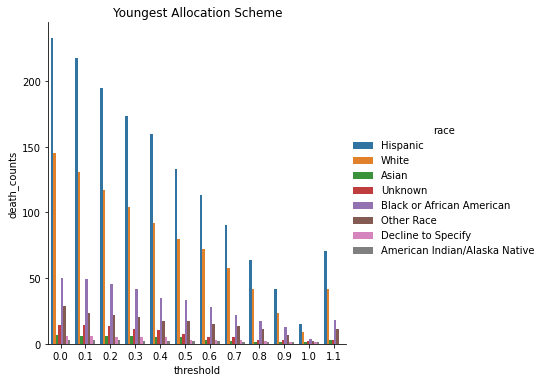

In [94]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_counts', hue='race', data=try_df_youngest, kind='bar')
plt.title('Youngest Allocation Scheme')
sn_plot.savefig("youngest_plot_output.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


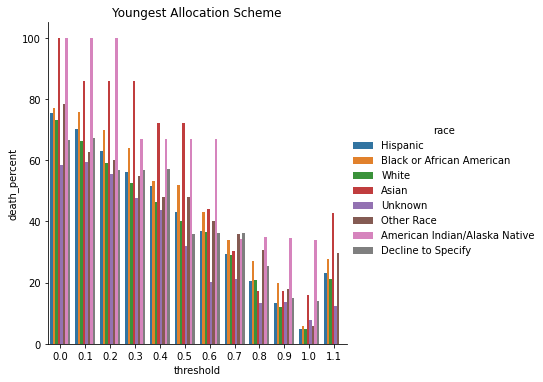

In [95]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=try_df_youngest, kind='bar')
plt.title('Youngest Allocation Scheme')
sn_plot.savefig("youngest_plot_percent_output.png")

### Sickest First 

In [96]:
iters = ITER
df_list_lot = []
df_list_lot.append(baseline_deaths2)

for threshold in thresholds:
    sums = 0
    dict_list = []
    df_inner_list = []
    for _ in range(iters):
        allocate = Allocation(working_df, threshold, qsofa_mortality_calibration)
        testing_df_lot = allocate.sickest_first()
        df_inner_list.append(testing_df_lot)
        sums += testing_df_lot['death'].sum()
        racial_deaths = testing_df_lot[testing_df_lot['death'] == 1]
        dict_list.append(Counter(racial_deaths['race_display']))

    out_df = pd.concat(df_inner_list).groupby(level=0).mean()
    out_df.to_csv('sim_results/sickest_{}.csv'.format(threshold.round(3)))
    new_df = pd.DataFrame(dict_list)
    temp_new_df = new_df.mean().round(3).to_frame().reset_index()
    temp_new_df = temp_new_df.rename(columns={'index': 'race', 0: 'death_counts'})
    temp_new_df['threshold'] = threshold.round(3)
    temp_new_df['avg_deaths'] = sums/iters
    df_list_lot.append(temp_new_df)
    #avg_deaths = sums/iters
    #avg_deaths

In [97]:
testing_df_lot.head()

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,zip_binned_by_poverty,zip_binned_by_income,death,allocated_vent
0,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic,White Hispanic,...,78130,1.5,10,65627.0,84515,9.5,2,3,0,yes
645,2020-11-12 13:00:00,2020-11-15 14:56:00,Williamson,IP ICU,85,Female,78681,Unknown,Black or African American,White Unknown Ethnicity,...,78681,0.8,4.7,107912.0,127129,3.5,1,5,0,yes
407,2020-06-29 07:53:00,2020-06-30 22:30:00,Medical Center,IP ICU,72,Male,78703,Not Hispanic or Latino,White,White Non Hispanic,...,78703,1.6,4.5,108548.0,184824,4.8,1,5,0,yes
408,2020-07-11 21:33:00,2020-07-24 17:00:00,Medical Center,IP Private/Semi Private room,45,Male,78703,Not Hispanic or Latino,Hispanic,White Non Hispanic,...,78703,1.6,4.5,108548.0,184824,4.8,1,5,1,yes
108,2020-08-29 02:01:00,2020-10-01 12:59:00,Dell Seton Med Cntr UT,IP Private Room,66,Female,78741,Hispanic or Latino,Hispanic,White Hispanic,...,78741,2.8,26.7,45835.0,62128,23.4,4,2,1,yes


In [98]:
try_df_sickest = pd.concat(df_list_lot)
try_df_sickest['death_percent'] = try_df_sickest.apply(lambda row: death_percent(row), axis=1)
try_df_sickest.to_csv('sickest_data_results.csv', index=False)
try_df_sickest

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type
0,Hispanic,71.000,1.1,24.666667,22.977346,Baseline
1,White,42.000,1.1,24.666667,21.212121,Baseline
2,Asian,3.000,1.1,24.666667,42.857143,Baseline
3,Unknown,3.000,1.1,24.666667,12.500000,Baseline
4,Black or African American,18.000,1.1,24.666667,27.692308,Baseline
...,...,...,...,...,...,...
3,Black or African American,3.910,1.0,32.336000,6.015385,NaN
4,Decline to Specify,1.243,1.0,32.336000,13.811111,NaN
5,Unknown,1.832,1.0,32.336000,7.633333,NaN
6,Asian,1.096,1.0,32.336000,15.657143,NaN


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


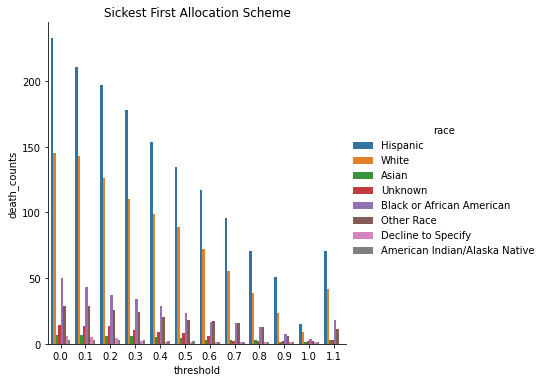

In [99]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_counts', hue='race', data=try_df_sickest, kind='bar')
plt.title('Sickest First Allocation Scheme')
sn_plot.savefig("sickest_plot_output.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


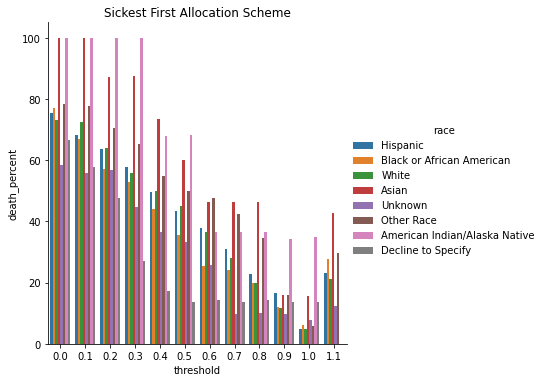

In [100]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=try_df_sickest, kind='bar')
plt.title('Sickest First Allocation Scheme')
sn_plot.savefig("sickest_plot_percent_output.png")

### Total 

In [101]:
try_df['allocation_type'] = 'Lottery'
try_df_ny['allocation_type'] = 'New York'
try_df_mar['allocation_type'] = 'Maryland'
try_df_youngest['allocation_type'] = 'Youngest First'
try_df_max_life['allocation_type'] = 'Max Life Years'
try_df_sickest['allocation_type'] = 'Sickest First'

In [102]:
total_df = pd.concat([
    try_df[['allocation_type', 'threshold', 'avg_deaths']], 
    try_df_ny[['allocation_type', 'threshold', 'avg_deaths']], 
    try_df_mar[['allocation_type', 'threshold', 'avg_deaths']], 
    try_df_youngest[['allocation_type', 'threshold', 'avg_deaths']], 
    try_df_max_life[['allocation_type', 'threshold', 'avg_deaths']], 
    try_df_sickest[['allocation_type', 'threshold', 'avg_deaths']], 
])

In [103]:
total_df.to_csv('total_avg_deaths_data_results.csv', index=False)

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


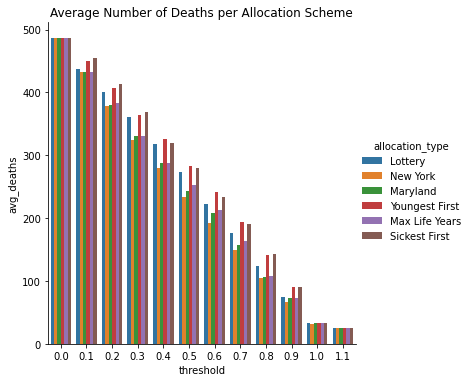

In [104]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='avg_deaths', hue='allocation_type', data=total_df, kind='bar')
plt.title('Average Number of Deaths per Allocation Scheme')
sn_plot.savefig("total_avg_deaths_plot_output.png")

### Break